# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [ ]:
# Data Import
!wget https://storage.googleapis.com/gtex_analysis_v8/interaction_qtl_data/GTEx_Analysis_v8_isQTL.tar

--2020-12-16 10:38:29--  https://storage.googleapis.com/gtex_analysis_v8/interaction_qtl_data/GTEx_Analysis_v8_isQTL.tar
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46766080 (45M) [application/x-tar]
Saving to: ‘GTEx_Analysis_v8_isQTL.tar.1’

GTEx_Analysis_v8_is 100%[===================>]  44.60M   202MB/s    in 0.2s    

2020-12-16 10:38:30 (202 MB/s) - ‘GTEx_Analysis_v8_isQTL.tar.1’ saved [46766080/46766080]



In [ ]:
!tar -xf GTEx_Analysis_v8_isQTL.tar

In [ ]:
cd GTEx_Analysis_v8_isQTL/

/content/GTEx_Analysis_v8_isQTL


In [ ]:
!gunzip Brain_Amygdala.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Anterior_cingulate_cortex_BA24.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Caudate_basal_ganglia.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Cerebellar_Hemisphere.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Cerebellum.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Cortex.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Frontal_Cortex_BA9.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Hippocampus.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Hypothalamus.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Nucleus_accumbens_basal_ganglia.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Putamen_basal_ganglia.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Spinal_cord_cervical_c-1.Neurons.isQTL.eigenMT.annotated.txt.gz
!gunzip Brain_Substantia_nigra.Neurons.isQTL.eigenMT.annotated.txt.gz

gzip: Brain_Amygdala.Neurons.isQTL.eigenMT.annotated.txt already exists; do you wish to overwrite (y or n)? n
	not overwritten
gzip: Brain_Anterior_cingulate_cortex_BA24.Neurons.isQTL.eigenMT.annotated.txt already exists; do you wish to overwrite (y or n)? ^C
gzip: Brain_Caudate_basal_ganglia.Neurons.isQTL.eigenMT.annotated.txt already exists; do you wish to overwrite (y or n)? ^C
gzip: Brain_Cerebellar_Hemisphere.Neurons.isQTL.eigenMT.annotated.txt already exists; do you wish to overwrite (y or n)? ^C
gzip: Brain_Cerebellum.Neurons.isQTL.eigenMT.annotated.txt already exists; do you wish to overwrite (y or n)? ^C
gzip: Brain_Cortex.Neurons.isQTL.eigenMT.annotated.txt already exists; do you wish to overwrite (y or n)? ^C
gzip: Brain_Frontal_Cortex_BA9.Neurons.isQTL.eigenMT.annotated.txt already exists; do you wish to overwrite (y or n)? ^C
gzip: Brain_Hippocampus.Neurons.isQTL.eigenMT.annotated.txt already exists; do you wish to overwrite (y or n)? ^C
gzip: Brain_Hypothalamus.Neurons.is

In [ ]:
!head Brain_Amygdala.Neurons.isQTL.eigenMT.annotated.txt

variant_id	gene_id	gene_name	biotype	phenotype_id	tss_distance	maf	ma_samples	ma_count	pval_g	b_g	b_g_se	pval_i	b_i	b_i_se	pval_gi	b_gi	b_gi_se	pval_emt	tests_emt	pval_adj_bh
chr1_903551_A_C_b38	ENSG00000227232.5	WASH7P	unprocessed_pseudogene	chr1:17368:17606:clu_32551:ENSG00000227232.5	873998	0.139535	34	36	0.156931	0.272783	0.191297	0.0441347	-0.658243	0.322979	0.000101523	0.830821	0.205348	0.108833	268	1
chr1_897843_C_T_b38	ENSG00000279457.4	RP11-34P13.18	unprocessed_pseudogene	chr1:188584:188791:clu_32554:ENSG00000279457.4	702432	0.244186	56	63	0.714528	0.0596679	0.162671	0.378722	-0.350564	0.396521	0.000427615	0.658401	0.180796	1	476	1
chr1_1171093_G_A_b38	ENSG00000228463.9	AP006222.2	lincRNA	chr1:259025:261550:clu_32556:ENSG00000228463.9	873591	0.24031	53	62	0.946981	-0.0127173	0.190772	0.11059	-0.736893	0.457829	0.0254825	-0.419073	0.184835	1	590	1
chr1_923311_TG_T_b38	ENSG00000237094.11	RP4-669L17.10	lincRNA	chr1:497299:498399:clu_32557:ENSG00000237094.11	421694	0.263566	61	68	

In [ ]:
!rm *.gz

In [ ]:
amygdala = pd.read_csv('Brain_Amygdala.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
ACC = pd.read_csv('Brain_Anterior_cingulate_cortex_BA24.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
CBG = pd.read_csv('Brain_Caudate_basal_ganglia.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
CBHS = pd.read_csv('Brain_Cerebellar_Hemisphere.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
CERE = pd.read_csv('Brain_Cerebellum.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
CORTEX = pd.read_csv('Brain_Cortex.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
FRCORT = pd.read_csv('Brain_Frontal_Cortex_BA9.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
HIPPO = pd.read_csv('Brain_Hippocampus.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
HYPOTH = pd.read_csv('Brain_Hypothalamus.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
NABG = pd.read_csv('Brain_Nucleus_accumbens_basal_ganglia.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
PBG = pd.read_csv('Brain_Putamen_basal_ganglia.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
SPINAL = pd.read_csv('Brain_Spinal_cord_cervical_c-1.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')
SUBNIG = pd.read_csv('Brain_Substantia_nigra.Neurons.isQTL.eigenMT.annotated.txt', sep='\t')

In [ ]:
amygdala.head()

,variant_id,gene_id,gene_name,biotype,phenotype_id,tss_distance,maf,ma_samples,ma_count,pval_g,b_g,b_g_se,pval_i,b_i,b_i_se,pval_gi,b_gi,b_gi_se,pval_emt,tests_emt,pval_adj_bh
0,chr1_903551_A_C_b38,ENSG00000227232.5,WASH7P,unprocessed_pseudogene,chr1:17368:17606:clu_32551:ENSG00000227232.5,873998,0.139535,34,36,0.156931,0.272783,0.191297,0.044135,-0.658243,0.322979,0.000102,0.830821,0.205348,0.108833,268,1.0
1,chr1_897843_C_T_b38,ENSG00000279457.4,RP11-34P13.18,unprocessed_pseudogene,chr1:188584:188791:clu_32554:ENSG00000279457.4,702432,0.244186,56,63,0.714528,0.059668,0.162671,0.378722,-0.350564,0.396521,0.000428,0.658401,0.180796,1.000000,476,1.0
2,chr1_1171093_G_A_b38,ENSG00000228463.9,AP006222.2,lincRNA,chr1:259025:261550:clu_32556:ENSG00000228463.9,873591,0.240310,53,62,0.946981,-0.012717,0.190772,0.110590,-0.736893,0.457829,0.025482,-0.419073,0.184835,1.000000,590,1.0
3,chr1_923311_TG_T_b38,ENSG00000237094.11,RP4-669L17.10,lincRNA,chr1:497299:498399:clu_32557:ENSG00000237094.11,421694,0.263566,61,68,0.601918,0.082428,0.157522,0.008291,-1.174230,0.436112,0.000048,0.678900,0.159831,0.036104,755,1.0
4,chr1_1592572_T_C_b38,ENSG00000228327.3,RP11-206L10.2,transcribed_unprocessed_pseudogene,chr1:736770:738834:clu_32558:ENSG00000228327.3,813946,0.337209,69,87,0.093021,-0.250522,0.147752,0.203673,0.521551,0.407665,0.005538,-0.388950,0.137232,1.000000,1016,1.0


In [ ]:
coreLNC = pd.read_csv('/content/coreLNC_rename.txt', sep='\t')

In [ ]:
coreLNC.shape

(1750, 4)

In [ ]:
coreLNC.sample(1)

,gene_ID,gene_stable_ID,transcript_ID,transcript_stableID
1171,ENSG00000180422,ENSG00000180422.3,ENST00000565008,ENST00000565008.1


In [ ]:
amygdala.columns

Index(['variant_id', 'gene_id', 'gene_name', 'biotype', 'phenotype_id',
       'tss_distance', 'maf', 'ma_samples', 'ma_count', 'pval_g', 'b_g',
       'b_g_se', 'pval_i', 'b_i', 'b_i_se', 'pval_gi', 'b_gi', 'b_gi_se',
       'pval_emt', 'tests_emt', 'pval_adj_bh'],
      dtype='object')

In [ ]:
list(coreLNC.columns)

['gene_ID', 'gene_stable_ID', 'transcript_ID', 'transcript_stableID']

In [ ]:
def lncMerger(sQTL):
  
  """ sQTL is a pandas for the splice variant
  coreLNC is the list of highly variable lncs
  between different tissues"""

  MERGED = sQTL.merge(coreLNC, how ="inner", left_on='gene_id', right_on='gene_stable_ID')
  MERGED = MERGED.drop(['variant_id', 'gene_id', 'gene_name', 'biotype', 'phenotype_id',
       'tss_distance', 'ma_samples', 'maf', 'pval_g', 'b_g',
       'b_g_se', 'pval_i', 'b_i', 'b_i_se', 'pval_gi', 'b_gi', 'b_gi_se',
       'pval_emt', 'tests_emt', 'pval_adj_bh', 'gene_stable_ID', 'transcript_ID', 
       'transcript_stableID'], axis=1)
  #MERGED = MERGED.set_index('maf', 'num_alt_per_site' )
  #I kept ma_count maf
  return MERGED


In [ ]:
amy = lncMerger(amygdala)
acc = lncMerger(ACC)
cbg = lncMerger(CBG)
cbhs = lncMerger(CBHS)
cere = lncMerger(CERE)
cortex = lncMerger(CORTEX)
frcort = lncMerger(FRCORT)
hippo = lncMerger(HIPPO)
hypoth = lncMerger(HYPOTH)
nabg = lncMerger(NABG)
pbg = lncMerger(PBG)
spinal = lncMerger(SPINAL)
subnig = lncMerger(SUBNIG)

In [ ]:
amy.head(1)

,ma_count,gene_ID
0,57,ENSG00000230415


In [ ]:
mylist = [acc, cbg, cbhs, cere, cortex, frcort, hippo, hypoth, nabg,
           pbg, spinal, subnig]

In [ ]:
x = amy.set_index('gene_ID').join(acc.set_index('gene_ID'), lsuffix='amy', rsuffix='acc')
#x = x.join(acc.set_index('gene_id'), lsuffix='amy', rsuffix='acc')


In [ ]:
x = x.join(cbg.set_index('gene_ID'), lsuffix='x', rsuffix='cbg')



In [ ]:
x = x.join(cbhs.set_index('gene_ID'), lsuffix='x', rsuffix='cbhs')


In [ ]:
x = x.join(cere.set_index('gene_ID'), lsuffix='x', rsuffix='cere').drop_duplicates()


In [ ]:
x = x.join(cortex.set_index('gene_ID'), lsuffix='x', rsuffix='cortex').drop_duplicates()
x = x.join(frcort.set_index('gene_ID'), lsuffix='x', rsuffix='frc').drop_duplicates()
x = x.join(hippo.set_index('gene_ID'), lsuffix='x', rsuffix='hip').drop_duplicates()
x = x.join(hypoth.set_index('gene_ID'), lsuffix='x', rsuffix='hyp').drop_duplicates()
x = x.join(nabg.set_index('gene_ID'), lsuffix='x', rsuffix='nabg').drop_duplicates()
x = x.join(pbg.set_index('gene_ID'), lsuffix='x', rsuffix='pbg').drop_duplicates()
x = x.join(spinal.set_index('gene_ID'), lsuffix='x', rsuffix='spi').drop_duplicates()
x = x.join(subnig.set_index('gene_ID'), lsuffix='x', rsuffix='sub').drop_duplicates()

In [ ]:
x.columns = ['amy','acc', 'cbg', 'cbhs', 'cere', 'cortex', 'frcort', 'hippo', 'hypoth', 'nabg',
           'pbg', 'spinal', 'subnig']

In [ ]:
x.sample(1)

,amy,acc,cbg,cbhs,cere,cortex,frcort,hippo,hypoth,nabg,pbg,spinal,subnig
gene_ID,,,,,,,,,,,,,
ENSG00000226471,57,144.0,82.0,118.0,135.0,71.0,60.0,119.0,68.0,135.0,158.0,100.0,42.0


In [ ]:
x = x.dropna()

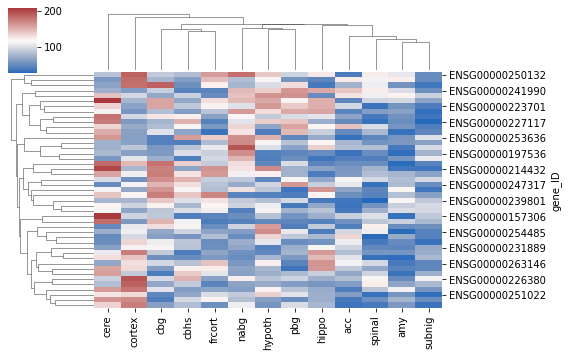

In [ ]:
sns.clustermap(x, cmap='vlag', metric= 'euclidean', figsize=[8,5])

In [ ]:
#del(x)

In [ ]:
x.to_csv("sQTLDATA.csv", sep='\t', index=None)

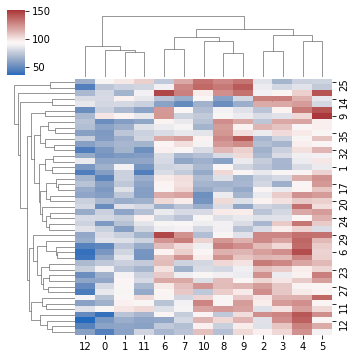

In [ ]:
from scipy.ndimage.filters import gaussian_filter
df3_smooth = gaussian_filter(x, sigma=0.65)
sns.clustermap(df3_smooth, 
               #vmin=-40, vmax=100,
               figsize=[5,5], 
               cmap='vlag', metric= 'euclidean')

#After Wanke

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('dark')

In [ ]:
df = pd.read_csv('sQTLDATA_1.csv',sep='\t')

In [ ]:
df.head()

,amy,acc,cbg,cbhs,cere,cortex,frcort,hippo,hypoth,nabg,pbg,spinal,subnig
0,33,92.0,89.0,42.0,206.0,96.0,46.0,74.0,85.0,53.0,56.0,102.0,89.0
1,72,135.0,64.0,58.0,50.0,98.0,83.0,80.0,135.0,52.0,89.0,30.0,44.0
2,32,35.0,61.0,101.0,80.0,64.0,94.0,52.0,44.0,168.0,47.0,52.0,76.0
3,111,41.0,104.0,62.0,161.0,179.0,68.0,72.0,121.0,63.0,86.0,87.0,58.0
4,60,79.0,44.0,42.0,75.0,65.0,81.0,116.0,114.0,169.0,85.0,56.0,65.0


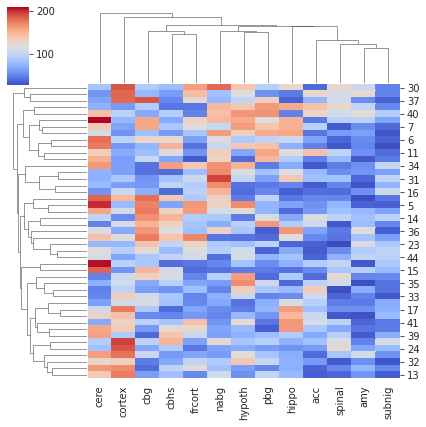

In [ ]:
from scipy.ndimage.filters import gaussian_filter
df3_smooth = gaussian_filter(df, sigma=0.65)
sns.clustermap(df,
               #3_smooth, 
               #vmin=-40, vmax=100,
               figsize=[6,6], 
               #standard_scale=0,
               cmap='coolwarm', metric= 'euclidean')

In [ ]:
def sumPlotter(dataframe):
  """ plot total sum in each column"""
  
  import seaborn as sns
  import pandas as pd

  colId = dataframe.columns

  sumList = []
  for i in colId:
    sum = dataframe[i].median()
    sumList.append(sum)

  table = pd.DataFrame(data={'colId':colId, 'sumList': sumList})
  

  return sns.barplot(x='colId', y='sumList', 
              data=table.sort_values(by = 'sumList'), palette='Greens')

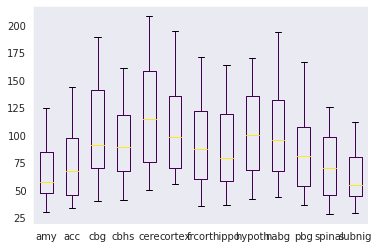

In [ ]:
df.plot(kind='box', cmap='viridis' )

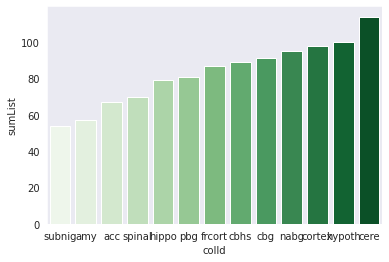

In [ ]:
sumPlotter(df)

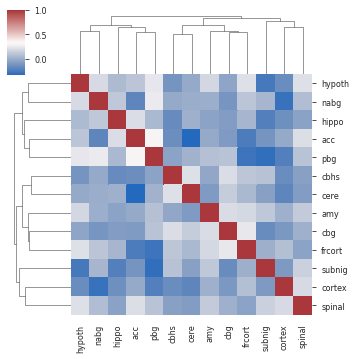

In [ ]:
sns.clustermap(df.corr(),
               figsize=[5,5],
               cmap='vlag')

In [ ]:
## R-SHEET
"""
library(ggplot2)
ggplot(mtcars, aes(x=CarBrand, y=mpg_z_score, label=mpg_z_score)) +
  geom_point(stat='identity', aes(col=mpg_type), size=6) +
  scale_color_manual(name="Mileage (deviation)",
                     labels = c("Above Average", "Below Average"),
                     values = c("above"="#00ba38", "below"="#0b8fd3")) +
  geom_text(color="white", size=2) +
  labs(title="Diverging Dot Plot (ggplot2)",
       subtitle="Z score showing Normalised mileage", caption="Produced by Gary Hutson") +
  ylim(-2.5, 2.5) +
  coord_flip() 
  """

'\nlibrary(ggplot2)\nggplot(mtcars, aes(x=CarBrand, y=mpg_z_score, label=mpg_z_score)) +\n  geom_point(stat=\'identity\', aes(col=mpg_type), size=6) +\n  scale_color_manual(name="Mileage (deviation)",\n                     labels = c("Above Average", "Below Average"),\n                     values = c("above"="#00ba38", "below"="#0b8fd3")) +\n  geom_text(color="white", size=2) +\n  labs(title="Diverging Dot Plot (ggplot2)",\n       subtitle="Z score showing Normalised mileage", caption="Produced by Gary Hutson") +\n  ylim(-2.5, 2.5) +\n  coord_flip() \n  '